# Configuration
____________________

In [ ]:
# set main directories
BASE_DIR = '/content/gdrive/MyDrive/AML_project/project/'
UTILS_DIR = BASE_DIR + 'utils'
DATA_DIR = BASE_DIR + 'data/'
TOKENIZER_DIR = BASE_DIR + 'tokenizers/'
MODEL_DIR = BASE_DIR + 'models/'
PRED_DIR = BASE_DIR + 'predictions/'
# mount drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# set utils directory
import sys
sys.path.append(UTILS_DIR)


Mounted at /content/gdrive


# Imports
____________________

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix

# utils
____________________

In [ ]:
def print_confusion_matrix(y_true, y_pred):
  print('\nConfusion matrices:')
  i = 0
  for cm in multilabel_confusion_matrix(y_true, y_pred, samplewise=False):
    print(labels[i])
    print(cm)
    i = i+1

labels = ['toxic', 'severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate']
labels_perf = ['Model', 'Performance', 'Value']

# Load data
____________________

In [ ]:
# load binary predictions
cnn_bin_pred = pd.read_csv(PRED_DIR + 'cnn_bin.csv', sep='\t')
lstm_bin_pred = pd.read_csv(PRED_DIR + 'lstm_bin.csv', sep='\t')
gru_bin_pred = pd.read_csv(PRED_DIR + 'gru_bin.csv', sep='\t')
bert_bin_pred = pd.read_csv(PRED_DIR + 'bert_bin.csv', sep='\t')

# load multi predictions
cnn_multi_pred = pd.read_csv(PRED_DIR + 'cnn_multi.csv', sep='\t')
lstm_multi_pred = pd.read_csv(PRED_DIR + 'lstm_multi.csv', sep='\t')
gru_multi_pred = pd.read_csv(PRED_DIR + 'gru_multi.csv', sep='\t')
bert_multi_pred = pd.read_csv(PRED_DIR + 'bert_multi.csv', sep='\t')

# load best 2 phases predictions
two_phases_pred = pd.read_csv(PRED_DIR + 'best_2_phases.csv', sep='\t')

# load single phase predictions
lstm_single_pred = pd.read_csv(PRED_DIR + 'lstm_single.csv', sep='\t')

# load all test labels
test_labels = pd.read_csv(DATA_DIR + 'test_labels_cleaned.csv', sep = '\t')

# filter labels for binary classification
test_labels_binary = test_labels['is_toxic']

# filter labels for multilabel classification
test_labels_multi = test_labels[test_labels['is_toxic'] == 1][labels]

# Compare binary models
____________________

### Multi CNN 

In [ ]:
acc_cnn_binary = round(accuracy_score(test_labels_binary, cnn_bin_pred), 5)
prec_cnn_binary = round(precision_score(test_labels_binary, cnn_bin_pred, average='macro'), 5)
rec_cnn_binary = round(recall_score(test_labels_binary, cnn_bin_pred, average='macro'), 5)
f1_cnn_binary = round(f1_score(test_labels_binary, cnn_bin_pred, average='macro'), 5)


print('CNN BINARY CLASSIFICATION')
print('\nConfusion matrix:\n')
print(confusion_matrix(test_labels_binary, cnn_bin_pred))
print('\nPerformance measures:\n')
print('Accuracy:', acc_cnn_binary)
print('Precision:', prec_cnn_binary)
print('Recall:', rec_cnn_binary)
print('F1 score:', f1_cnn_binary)

CNN BINARY CLASSIFICATION

Confusion matrix:

[[49816  7459]
 [  481  5761]]

Performance measures:

Accuracy: 0.87499
Precision: 0.71311
Recall: 0.89636
F1 score: 0.75911


### Bidirectional LSTM

In [ ]:
acc_lstm_binary = round(accuracy_score(test_labels_binary, lstm_bin_pred), 5)
prec_lstm_binary = round(precision_score(test_labels_binary, lstm_bin_pred, average='macro'), 5)
rec_lstm_binary = round(recall_score(test_labels_binary, lstm_bin_pred, average='macro'), 5)
f1_lstm_binary = round(f1_score(test_labels_binary, lstm_bin_pred, average='macro'), 5)


print('LSTM BINARY CLASSIFICATION')
print('\nConfusion matrix:\n')
print(confusion_matrix(test_labels_binary, lstm_bin_pred))
print('\nPerformance measures:\n')
print('Accuracy:', acc_lstm_binary)
print('Precision:', prec_lstm_binary)
print('Recall:', rec_lstm_binary)
print('F1 score:', f1_lstm_binary)

LSTM BINARY CLASSIFICATION

Confusion matrix:

[[51257  6018]
 [  551  5691]]

Performance measures:

Accuracy: 0.89658
Precision: 0.7377
Recall: 0.90333
F1 score: 0.78692


### Bidirectional GRU

In [ ]:
acc_gru_binary = round(accuracy_score(test_labels_binary, gru_bin_pred), 5)
prec_gru_binary = round(precision_score(test_labels_binary, gru_bin_pred, average='macro'), 5)
rec_gru_binary = round(recall_score(test_labels_binary, gru_bin_pred, average='macro'), 5)
f1_gru_binary = round(f1_score(test_labels_binary, gru_bin_pred, average='macro'), 5)


print('GRU BINARY CLASSIFICATION')
print('\nConfusion matrix:\n')
print(confusion_matrix(test_labels_binary, gru_bin_pred))
print('\nPerformance measures:\n')
print('Accuracy:', acc_gru_binary)
print('Precision:', prec_gru_binary)
print('Recall:', rec_gru_binary)
print('F1 score:', f1_gru_binary)

GRU BINARY CLASSIFICATION

Confusion matrix:

[[49932  7343]
 [  383  5859]]

Performance measures:

Accuracy: 0.87836
Precision: 0.71809
Recall: 0.90522
F1 score: 0.76542


### Transfer learning BERT

In [ ]:
acc_bert_binary = round(accuracy_score(test_labels_binary, bert_bin_pred), 5)
prec_bert_binary = round(precision_score(test_labels_binary, bert_bin_pred, average='macro'), 5)
rec_bert_binary = round(recall_score(test_labels_binary, bert_bin_pred, average='macro'), 5)
f1_bert_binary = round(f1_score(test_labels_binary, bert_bin_pred, average='macro'), 5)


print('BERT BINARY CLASSIFICATION')
print('\nConfusion matrix:\n')
print(confusion_matrix(test_labels_binary, bert_bin_pred))
print('\nPerformance measures:\n')
print('Accuracy:', acc_bert_binary)
print('Precision:', prec_bert_binary)
print('Recall:', rec_bert_binary)
print('F1 score:', f1_bert_binary)

BERT BINARY CLASSIFICATION

Confusion matrix:

[[49597  7678]
 [  472  5770]]

Performance measures:

Accuracy: 0.87169
Precision: 0.70982
Recall: 0.89516
F1 score: 0.75508


### Summary

In [ ]:
performance_binary = pd.DataFrame([
                                   ['CNN', 'Accuracy', acc_cnn_binary],
                                   ['CNN', 'Precision', prec_cnn_binary],
                                   ['CNN', 'Recall', rec_cnn_binary],
                                   ['CNN', 'F1-score', f1_cnn_binary],

                                   ['LSTM', 'Accuracy', acc_lstm_binary],
                                   ['LSTM', 'Precision', prec_lstm_binary],
                                   ['LSTM', 'Recall', rec_lstm_binary],
                                   ['LSTM', 'F1-score', f1_lstm_binary],

                                   ['GRU', 'Accuracy', acc_gru_binary],
                                   ['GRU', 'Precision', prec_gru_binary],
                                   ['GRU', 'Recall', rec_gru_binary],
                                   ['GRU', 'F1-score', f1_gru_binary],

                                   ['BERT', 'Accuracy', acc_bert_binary],
                                   ['BERT', 'Precision', prec_bert_binary],
                                   ['BERT', 'Recall', rec_bert_binary],
                                   ['BERT', 'F1-score', f1_bert_binary]
                                   ], columns=labels_perf)

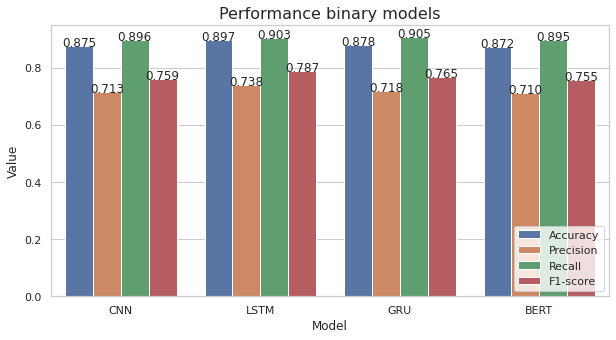

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model',
            y='Value', 
            hue='Performance', 
            data=performance_binary)
plt.legend(loc='lower right')
plt.title('Performance binary models', size=16)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.3f}'.format(height),
            ha="center") 
plt.show()

# Compare multilabels models
____________________

### Multichannel CNN 

In [ ]:
acc_cnn_multi = round(accuracy_score(test_labels_multi, cnn_multi_pred), 5)
prec_cnn_multi = round(precision_score(test_labels_multi, cnn_multi_pred, average='macro'), 5)
rec_cnn_multi = round(recall_score(test_labels_multi, cnn_multi_pred, average='macro'), 5)
f1_cnn_multi = round(f1_score(test_labels_multi, cnn_multi_pred, average='macro'), 5)


print('CNN MULTILABEL CLASSIFICATION')
print_confusion_matrix(test_labels_multi, cnn_multi_pred)
print('\nPerformance measures:\n')
print('Accuracy:', acc_cnn_multi)
print('Precision:', prec_cnn_multi)
print('Recall:', rec_cnn_multi)
print('F1 score:', f1_cnn_multi)

CNN MULTILABEL CLASSIFICATION

Confusion matrices:
toxic
[[   4  149]
 [  61 6028]]
severe_toxic
[[5534  341]
 [ 189  178]]
obscene
[[1738  814]
 [ 750 2940]]
threat
[[5948   83]
 [ 127   84]]
insult
[[1778 1038]
 [ 992 2434]]
identity_hate
[[5370  160]
 [ 383  329]]

Performance measures:

Accuracy: 0.41045
Precision: 0.66314
Recall: 0.6404
F1 score: 0.64544


### Bidirectional LSTM

In [ ]:
acc_lstm_multi = round(accuracy_score(test_labels_multi, lstm_multi_pred), 5)
prec_lstm_multi = round(precision_score(test_labels_multi, lstm_multi_pred, average='macro'), 5)
rec_lstm_multi = round(recall_score(test_labels_multi, lstm_multi_pred, average='macro'), 5)
f1_lstm_multi = round(f1_score(test_labels_multi, lstm_multi_pred, average='macro'), 5)


print('LSTM MULTILABEL CLASSIFICATION')
print_confusion_matrix(test_labels_multi, lstm_multi_pred)
print('\nPerformance measures:\n')
print('Accuracy:', acc_lstm_multi)
print('Precision:', prec_lstm_multi)
print('Recall:', rec_lstm_multi)
print('F1 score:', f1_lstm_multi)

LSTM MULTILABEL CLASSIFICATION

Confusion matrices:
toxic
[[   8  145]
 [ 129 5960]]
severe_toxic
[[5353  522]
 [ 168  199]]
obscene
[[1582  970]
 [ 556 3134]]
threat
[[5935   96]
 [  96  115]]
insult
[[1779 1037]
 [ 852 2574]]
identity_hate
[[5256  274]
 [ 276  436]]

Performance measures:

Accuracy: 0.40452
Precision: 0.64797
Recall: 0.71318
F1 score: 0.67289


### Bidirectional GRU

In [ ]:
acc_gru_multi = round(accuracy_score(test_labels_multi, gru_multi_pred), 5)
prec_gru_multi = round(precision_score(test_labels_multi, gru_multi_pred, average='macro'), 5)
rec_gru_multi = round(recall_score(test_labels_multi, gru_multi_pred, average='macro'), 5)
f1_gru_multi = round(f1_score(test_labels_multi, gru_multi_pred, average='macro'), 5)


print('GRU MULTILABEL CLASSIFICATION')
print_confusion_matrix(test_labels_multi, gru_multi_pred)
print('\nPerformance measures:\n')
print('Accuracy:', acc_gru_multi)
print('Precision:', prec_gru_multi)
print('Recall:', rec_gru_multi)
print('F1 score:', f1_gru_multi)

GRU MULTILABEL CLASSIFICATION

Confusion matrices:
toxic
[[  13  140]
 [ 124 5965]]
severe_toxic
[[5521  354]
 [ 204  163]]
obscene
[[1664  888]
 [ 571 3119]]
threat
[[5962   69]
 [ 116   95]]
insult
[[1818  998]
 [ 802 2624]]
identity_hate
[[5302  228]
 [ 289  423]]

Performance measures:

Accuracy: 0.43207
Precision: 0.67071
Recall: 0.67988
F1 score: 0.67159


### Transfer learning BERT

In [ ]:
acc_bert_multi = round(accuracy_score(test_labels_multi, bert_multi_pred), 5)
prec_bert_multi = round(precision_score(test_labels_multi, bert_multi_pred, average='macro'), 5)
rec_bert_multi = round(recall_score(test_labels_multi, bert_multi_pred, average='macro'), 5)
f1_bert_multi = round(f1_score(test_labels_multi, bert_multi_pred, average='macro'), 5)


print('BERT MULTILABEL CLASSIFICATION')
print_confusion_matrix(test_labels_multi, gru_multi_pred)
print('\nPerformance measures:\n')
print('Accuracy:', acc_bert_multi)
print('Precision:', prec_bert_multi)
print('Recall:', rec_bert_multi)
print('F1 score:', f1_bert_multi)

BERT MULTILABEL CLASSIFICATION

Confusion matrices:
toxic
[[  13  140]
 [ 124 5965]]
severe_toxic
[[5521  354]
 [ 204  163]]
obscene
[[1664  888]
 [ 571 3119]]
threat
[[5962   69]
 [ 116   95]]
insult
[[1818  998]
 [ 802 2624]]
identity_hate
[[5302  228]
 [ 289  423]]

Performance measures:

Accuracy: 0.41012
Precision: 0.66839
Recall: 0.65951
F1 score: 0.65809


### Summary

In [ ]:
performance_multi = pd.DataFrame([
                                   ['CNN', 'Accuracy', acc_cnn_multi],
                                   ['CNN', 'Precision', prec_cnn_multi],
                                   ['CNN', 'Recall', rec_cnn_multi],
                                   ['CNN', 'F1-score', f1_cnn_multi],

                                   ['LSTM', 'Accuracy', acc_lstm_multi],
                                   ['LSTM', 'Precision', prec_lstm_multi],
                                   ['LSTM', 'Recall', rec_lstm_multi],
                                   ['LSTM', 'F1-score', f1_lstm_multi],

                                   ['GRU', 'Accuracy', acc_gru_multi],
                                   ['GRU', 'Precision', prec_gru_multi],
                                   ['GRU', 'Recall', rec_gru_multi],
                                   ['GRU', 'F1-score', f1_gru_multi],
                                  
                                   ['BERT', 'Accuracy', acc_bert_multi],
                                   ['BERT', 'Precision', prec_bert_multi],
                                   ['BERT', 'Recall', rec_bert_multi],
                                   ['BERT', 'F1-score', f1_bert_multi]
                                   ], columns=labels_perf)

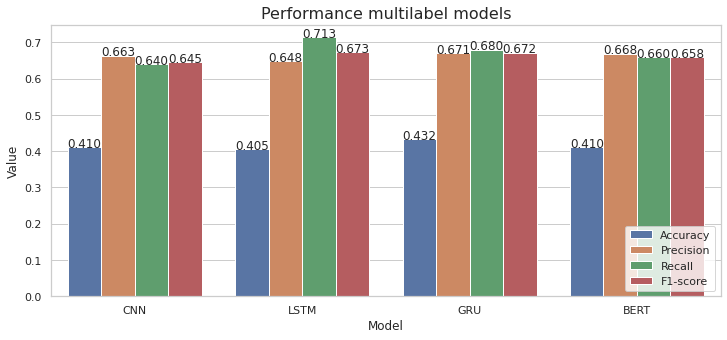

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model',
            y='Value', 
            hue='Performance', 
            data=performance_multi)
plt.legend(loc='lower right')
plt.title('Performance multilabel models', size=16)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.3f}'.format(height),
            ha="center") 
plt.show()

# Combined models
____________________

### LSTM -> LSTM

LSTM + fasttext has been chosen for both phases binary and multilabel classification since it's the one performing better.

In [ ]:
acc_two_phases = round(accuracy_score(test_labels[labels], two_phases_pred), 5)
prec_two_phases = round(precision_score(test_labels[labels], two_phases_pred, average='macro'), 5)
rec_two_phases = round(recall_score(test_labels[labels], two_phases_pred, average='macro'), 5)
f1_two_phases = round(f1_score(test_labels[labels], two_phases_pred, average='macro'), 5)


print('LSTM MULTILABEL CLASSIFICATION')
print_confusion_matrix(test_labels[labels], two_phases_pred)
print('\nPerformance measures:\n')
print('Accuracy:', acc_two_phases)
print('Precision:', prec_two_phases)
print('Recall:', rec_two_phases)
print('F1 score:', f1_two_phases)

LSTM MULTILABEL CLASSIFICATION

Confusion matrices:
toxic
[[51536  5892]
 [  604  5485]]
severe_toxic
[[62559   591]
 [  168   199]]
obscene
[[56648  3179]
 [  619  3071]]
threat
[[63082   224]
 [  101   110]]
insult
[[57296  2795]
 [  896  2530]]
identity_hate
[[62220   585]
 [  292   420]]

Performance measures:

Accuracy: 0.84321
Precision: 0.40796
Recall: 0.6875
F1 score: 0.51018


### Summary

In [ ]:
performance_best = pd.DataFrame([
                                   ['2 phases', 'Accuracy', acc_two_phases],
                                   ['2 phases', 'Precision', prec_two_phases],
                                   ['2 phases', 'Recall', rec_two_phases],
                                   ['2 phases', 'F1-score', f1_two_phases]
                                   ], columns=labels_perf)

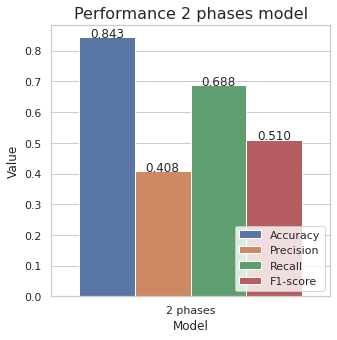

In [ ]:
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model',
            y='Value', 
            hue='Performance', 
            data=performance_best)
plt.legend(loc='lower right')
plt.title('Performance 2 phases model', size=16)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.3f}'.format(height),
            ha="center") 
plt.show()